# Задание 4

Retention rate — коэффициент удержания клиентов. Он показывает долю пользователей, которые вернулись в приложение спустя N дней, недель или месяцев после своего первого входа — метрику можно рассчитывать по любым периодам, которые интересуют.

Задание:

На основе данных в таблице user_actions рассчитайте показатель дневного Retention для всех пользователей, разбив их на когорты по дате первого взаимодействия с нашим приложением.

В результат включите четыре колонки: месяц первого взаимодействия, дату первого взаимодействия, количество дней, прошедших с даты первого взаимодействия (порядковый номер дня начиная с 0), и само значение Retention.

Колонки со значениями назовите соответственно start_month, start_date, day_number, retention.

Метрику необходимо выразить в виде доли, округлив полученные значения до двух знаков после запятой.

Месяц первого взаимодействия укажите в виде даты, округлённой до первого числа месяца.

Результат должен быть отсортирован сначала по возрастанию даты первого взаимодействия, затем по возрастанию порядкового номера дня.

Поля в результирующей таблице: start_month, start_date, day_number, retention

```sql
WITH all_table AS (
  SELECT
    *,
    DATE_trunc('month', time :: date) :: date AS start_month
  FROM
    user_actions
),
first_action AS (
  SELECT
    user_id,
    min(start_month) AS start_month,
    min(time :: date) AS start_date
  FROM
    all_table
  GROUP BY
    1
),
unique_users AS (
  SELECT
    start_month,
    start_date,
    user_actions.time :: date - start_date AS day_number,
    count(DISTINCT user_id) AS uniq_users
  FROM
    first_action
    JOIN user_actions using (user_id)
  GROUP BY
    1,
    2,
    3
)
SELECT
  start_month,
  start_date,
  day_number,
  round(
    uniq_users :: decimal / LAG(uniq_users, day_number) OVER (PARTITION BY start_month, start_date),
    2
  ) AS retention
FROM
  unique_users
ORDER BY
  1,
  2,
  3
```

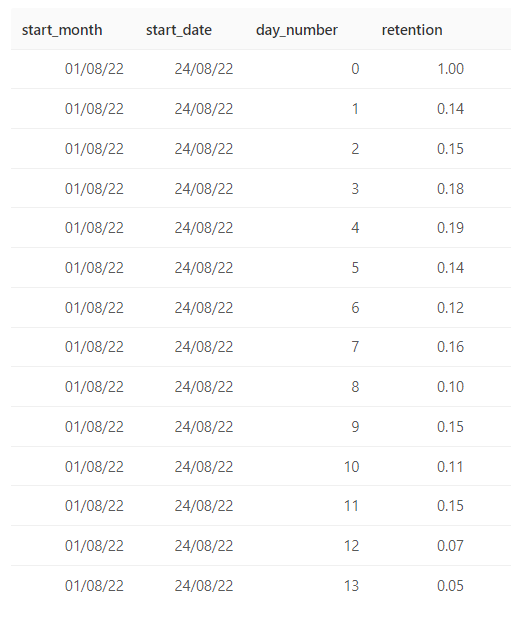

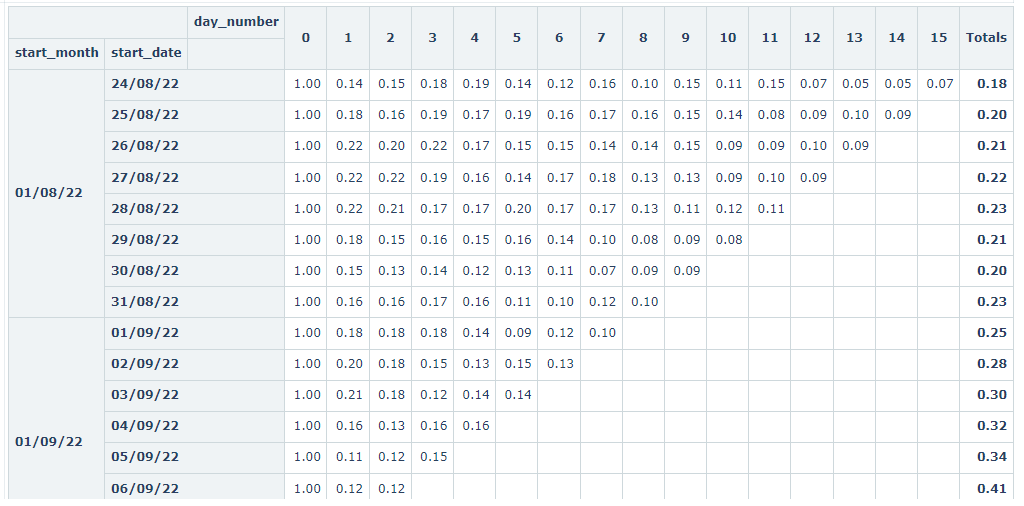